<a href="https://colab.research.google.com/github/Mafia3641/Collab_practice/blob/main/Practice_0_7_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Стрепетов Степан Дмитриевич

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


# Отправка запроса о погоде
def send_requests(url):
		response = requests.get(url)
		status_code = response.status_code

		if status_code == 200:
				return response.json()

		return None


# Текущая дата
def clear_data(data):

		# Текущая дата
		current_date = datetime.today().date()
		current_date = f'{current_date.day}.{current_date.month}'

		# Получение температуры
		temperature = data['current']['temperature_2m']

		# Код погоды
		weather_code = data['current']['weather_code']

		if weather_code in [0, 1]:
				weather = 'нет осадков, ясно'
		elif weather_code == 45:
				weather = 'нет осадков, туман'
		elif weather_code in [61, 63, 65 ,71 ,73, 75]:
				weather = 'осадки, нет тумана'
		else:
				weather = 'выгляни в окно и посмотри сам'

		message = f'Сегодня ({current_date}) погода {temperature} ◦С, {weather}'

		return message


def main():

	coordinates = input("Введите текущие координаты: ")
	coordinates = coordinates.split(', ')

	coord_x = coordinates[0]
	coord_y = coordinates[1]

	url = f'https://api.open-meteo.com/v1/forecast?latitude={coord_x}&longitude={coord_y}&current=temperature_2m,precipitation,weather_code&hourly=temperature_2m&daily=weather_code&timezone=GMT&forecast_days=1'
	request = send_requests(url)
	message = clear_data(request)
	print(message)


main()


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
from requests import get


def request(url):
		response = get(url)

		if response.status_code == 200:
				return response.json()

		return None


# Возвращает параметры покемона [имя, тип, вес, рост, способности]
def get_pokemon_params(url):

		ability_list = []
		data = request(url)

		name = data['name']
		type_ = data['types'][0]['type']['name']
		weight = data['weight']
		height = data['height']

		for util in data['abilities']:
				ability_list.append(util['ability']['name'])
				abilites = ', '.join(ability_list)

		message = [name, type_, weight, height, abilites]

		return message


def main():

		available_names = {}
		start = input("Нажмите любую кнопку, чтобы начать: ")
		url = 'https://pokeapi.co/api/v2/pokemon?offset=20&limit=20'

		for dict_ in request(url)['results']:
				available_names[dict_['name']] = dict_['url']
				print(dict_['name'])

		while True:
				current_name = input("Введите имя покемона из списка: ")
				if current_name not in available_names:
						print("Нет такого покемона! ")
				else:
						break

		curr_url = available_names[f'{current_name}']
		message = get_pokemon_params(curr_url)

		print(f'Name: {message[0]},\nType: {message[1]},\nWeight: {message[2]},\nHeight: {message[3]},\nAbilities: {message[4]}')


main()


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
from requests import get


def request(url):
		response = get(url)

		if response.status_code == 200:
				return response.json()
		return None


def get_all_posts(url):
		return request(url)


def get_posts_from_id(id, url):
		for post in request(url):
				if post['id'] == int(id):
						return post
		return None


def info(id, url):
		data = get_posts_from_id(id, url)

		user_id = data['userId']
		title = data['title']
		body = data['body']

		return [user_id, title, body]


def main():
		url = 'https://jsonplaceholder.typicode.com/posts'

		input("Нажмите любую кнопку, чтобы начать: ")

		print(get_all_posts(url))

		id = input("Введите id поста: ")
		print(get_posts_from_id(id, url))
		message = info(id, url)

		print(f'User id is: {message[0]}')
		print(f'Title is: {message[1]}')
		print(f'Body is: {message[2]}')


main()


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import json
from requests import *

url = 'https://jsonplaceholder.typicode.com/posts'


def request(url):
		response = get(url)

		if response.status_code == 200:
				return response.json()
		return None


def new_post(user_id, title, body, url=url):
		data = json.dumps({'userId': user_id, 'title': title, 'body': body})
		post(url, json=data)

		return data


def create_post():
		title = input("Введите заголовок: ")
		body = input("Введите содержимое: ")
		user_id = input("Введите id пользователя: ")

		return new_post(user_id, title, body)


def rewrite(post_id, url=url):
		for i in request(url):
				if i['id'] == post_id:
						user_id = i['userId']
						break

		else:
				return 0

		title = input("Новый заголовок: ")
		body = input("Новое содержание: ")

		data = {"user_id": user_id, "id": post_id, "title": title, "body": body}
		put(url, data)

		return data


def delete_post(post_id, url=url):
		for i in request(url):
				if post_id == i["id"]:
						title = i["title"]
						body = i["body"]
						user_id = i["userId"]
						break
		else:
				return 0

		data = {"userId": user_id, 'id': post_id, "title": title, "body": body}
		data = json.dumps(data)
		r = delete(url, data=data)

		return r


def main():

		print(create_post())

		print(rewrite(int(input("Введите id поста для изменения: "))))

		print(delete_post(int(input("Введите id поста для удаления: "))))


main()


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Список доступных пород:

1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
7

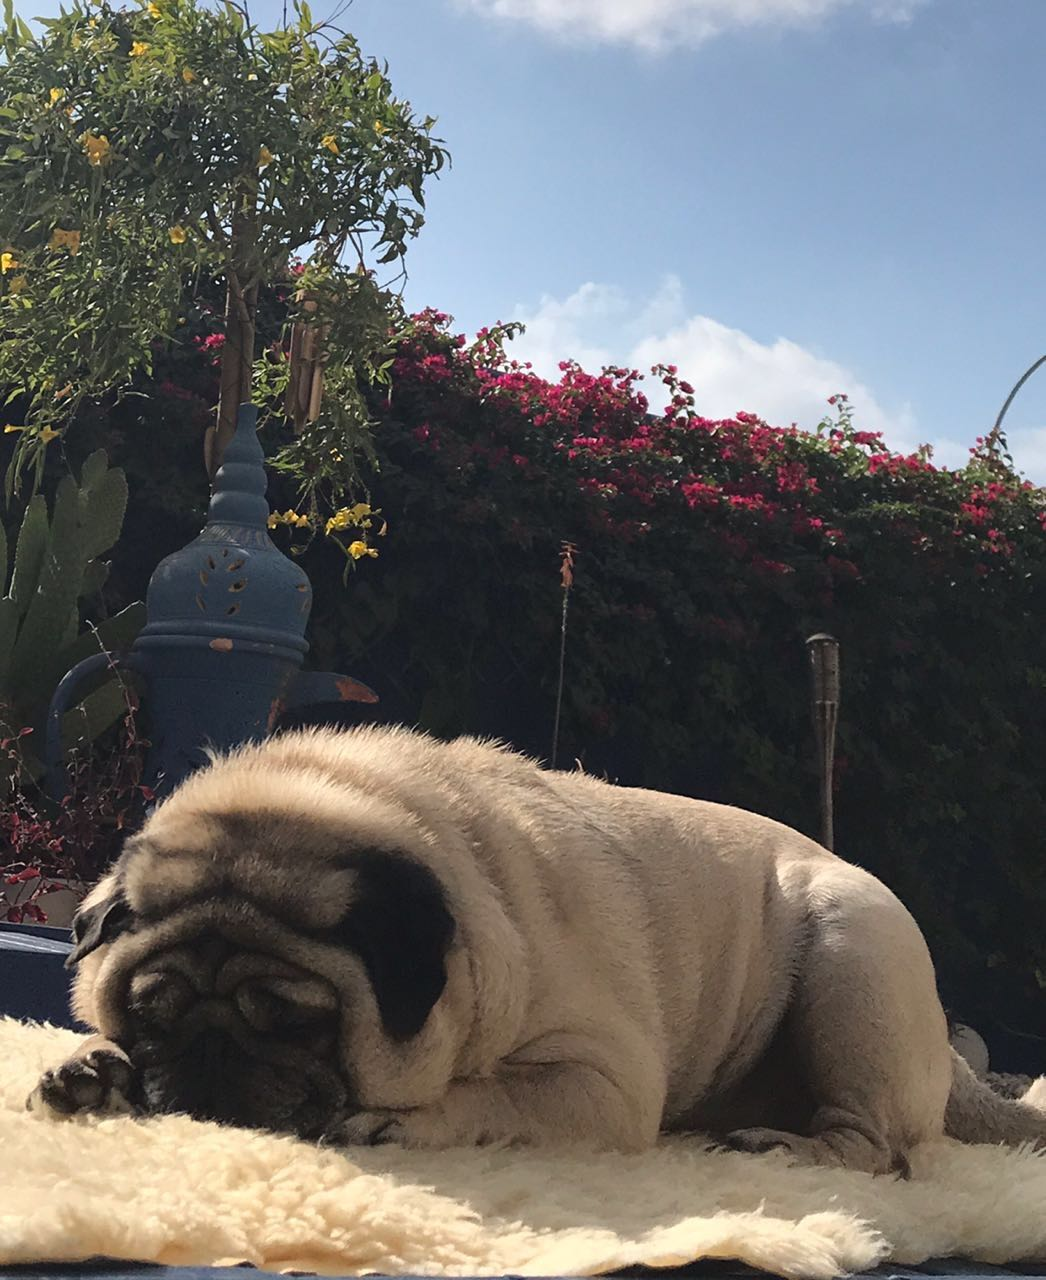

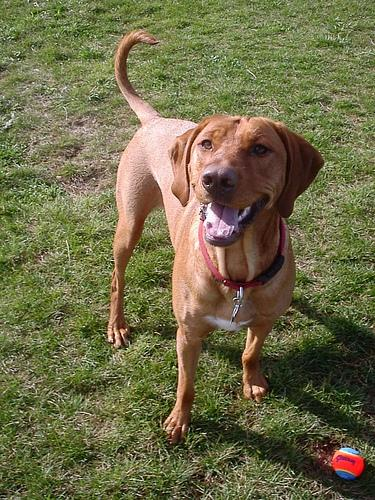

In [3]:
import requests
from PIL import Image
from IPython.display import display
import io


def get_all_breeds():
    url = "https://dog.ceo/api/breeds/list/all"
    response = requests.get(url)
    if response.status_code == 200:
        breeds = response.json()['message']
        breed_list = [f"{i+1}. {breed}" for i, breed in enumerate(breeds.keys())]
        return "\n".join(breed_list), list(breeds.keys())
    return "Ошибка при получении списка пород", []


def fetch_dog_images(breeds):
    for breed in breeds:
        url = f"https://dog.ceo/api/breed/{breed}/images/random"
        response = requests.get(url)
        if response.status_code == 200:
            image_url = response.json()['message']
            res = requests.get(image_url)
            img = Image.open(io.BytesIO(res.content))
            display(img)
        else:
            print(f"Ошибка при получении изображения для породы {breed}")


breed_list, all_breeds = get_all_breeds()
print("Список доступных пород:\n")
print(breed_list)

user_input = input("\nВведите одну или несколько пород собак через запятую (имя породы): ")
selected_breeds = [breed.strip().lower() for breed in user_input.split(",") if breed.strip().lower() in all_breeds]

if selected_breeds:
    fetch_dog_images(selected_breeds)
else:
    print("Неверный ввод или породы не найдены.")
